The first function sums the pahses to make intensity in accordance with the formula $ I(t)$ = $ \beta E_0^2 \sum_{j} \sum_{k} e^{i(\phi_j(t) - \phi_k(t)} $ Actually we only ccare abouut the real part so the function uses cosine instead of $e^i$. Tests are done to check that order does not matter, and that when all numbers are the same it returns the square of the length of the array, and that the negative of an array returns the same value as its positive.

In [56]:
import numpy as np
import random
import math
import matplotlib.pyplot as plt

def intensitymaker(phases):
    '''given an array of phases, returns electrical intensity
    >>> intensitymaker([1,2,3,4])
    3.5972414958193784
    >>> intensitymaker([4,3,2,1])
    3.5972414958193784
    >>> intensitymaker([3,1,2,4])
    3.5972414958193784
    >>> intensitymaker([-1,-2,-3,-4])
    3.5972414958193784
    >>> intensitymaker([1,1,1,1])
    16.0
    >>> intensitymaker([0,0,0])
    9.0
    >>> intensitymaker([999,999,999])
    9.0
    >>> intensitymaker([-1,-1,-1])
    9.0
    '''
    
    angle_difference = np.subtract.outer(phases,phases) #this makes an array of every phi minus every other phi
    intensity = np.sum(np.cos(angle_difference)) #this is the equation above but with the constants set to 1
    
    return(intensity)

if __name__ == "__main__":
    import doctest
    doctest.testmod()

This function moves every particle in accordance with the predicted gaussian pattern. The mean of this pattern is 0 and the variance is $\sigma^2 = \frac{2k_b T}{\alpha} t$ where $\alpha = 3 \pi \eta d$. $\eta$ is the viscosity of the water, and $d$ is the diameter of the microsphere. Due to the random nature of this function, the test is not a docstring test but a separate function.

In [17]:
def timestep(r,hz):
    '''returns x y and z positions after a time step given the current position vectors in a 3 dimensional arrays and the
    frequency (hz)
    '''
    sd = math.sqrt(2 * 1.38064852*10**-23 * 293 * 1/hz / (3 * math.pi * .001 * .00001)) #this is the standard deviation predicted above
    for i in range(len(r[0])):
        r[0][i] += np.random.normal(0,sd) #the x coordinates
        r[1][i] += np.random.normal(0,sd) #the y coordinates
        r[2][i] += np.random.normal(0,sd) #the z coordinates
    return(r)

In [70]:
from scipy import stats
'''Timestep testing
This test checks that the data after 1 step is normal, after 100 steps is normal, and that the standard deviation after 100
steps is larger than that after 1 step
'''

rtest = np.array([np.zeros(1000),np.zeros(1000),np.zeros(1000)])
rtest1 = timestep(rtest,1)
k1x, p1x = stats.normaltest(rtest1[0]) #I don't care about k, but p is the probability for a 2 sided chi square test, which can tell 
                                       #us if this data fits a normal distribution
k1y, p1y = stats.normaltest(rtest1[1])
k1z, p1z = stats.normaltest(rtest1[2])    
confidence = 0.05
if p1x < confidence and p1y < confidence and p1z < confidence:
    print("To 95% confidence the data after 1 step is NOT a normal distribution")
else:
    print("To 95% confidence the data after 1 step is a normal distribution")

rtest100 = np.array([np.zeros(1000),np.zeros(1000),np.zeros(1000)])   
for i in range(100):
    rtest100 = timestep(rtest100,1)

k2x, p2x = stats.normaltest(rtest100[0])
k2y, p2y = stats.normaltest(rtest100[1])
k2z, p2z = stats.normaltest(rtest100[2])
if p2x < confidence and p2y < confidence and p2z < confidence:
    print("ERROR: To 95% confidence the data after 100 steps is NOT a normal distribution")
else:
    print("To 95% confidence the data after 100 steps is a normal distribution")

sd1x = np.std(rtest[0])#this gives the standard distribution of the data
sd1y = np.std(rtest[1])
sd1z = np.std(rtest[2])

sd2x = np.std(rtest100[0])
sd2y = np.std(rtest100[1])
sd2z = np.std(rtest100[2])

if sd2x > sd1x and sd2y > sd1y and sd2z > sd1z:
    print("The data spreads as time advances")
else:
    print("ERROR: The data DOES NOT spread as time advances")

To 95% confidence the data after 1 step is a normal distribution
To 95% confidence the data after 100 steps is a normal distribution
The data spreads as time advances


The phasemaker function, when given the displacement of the particles $r$ and the angle $\theta$ (the angle from the laser from which the displacement is measured) will. First we establish the magnitude of $K$ by $K = \frac{2 \pi}{\lambda} \sin(\theta/2)$. From that magnitude, the component vectors can be found by multiplying $K$ by $\cos(\theta)$ and by $\sin(\theta)$, and we put those component vectors into an array so we can get the vector $\boldsymbol{K}$. The dot product $\boldsymbol{K} \cdot \boldsymbol{r} = \phi$, so we use this function to create an array of the phase of light scattered from each particle. An more in depth explanation of the math behind this can be found in the paper

In [99]:

def phasemaker(r,theta):
    '''given positions of particles relative to their starting positions returns phases
    >>> phasemaker([[0],[0],[0]],math.pi/2)
    [0.0]
    >>> phasemaker([[1],[2],[3]],math.pi/2)
    [13993332.088687768]
    >>> phasemaker([[1],[2],[50000000]],math.pi/2)
    [13993332.088687768]
    >>> phasemaker([[2],[1],[3]],math.pi/2)
    [6996666.044343885]
     >>> phasemaker([[1],[2],[3]],math.pi*2)
     [0.0]
     >>> phasemaker([[1],[2],[3]],math.pi*4)
     [0.0] 
    '''
    constant = 2* math.pi / 0.000000635 
    K = constant * math.sin(theta/2) #this is the magnitude of wavevector K
    k = np.array([K * math.cos(theta), K * math.sin(theta), 0]) #this divides K into component vectors for x and y direction.
                                                                #there is no z component to the vector K
    phase = []
    for i in range(len(r[0])):
        vector = np.array([r[0][i],r[1][i],r[2][i]])#this is the displacement vector for a single particle 
        phase_one = np.dot(k,vector) #this is the phase of the light scattered from a single particle
        phase.append(phase_one) #here we build an array consisting of all the phases
    return(phase)


if __name__ == "__main__":
    import doctest
    doctest.testmod()

**********************************************************************
File "__main__", line 12, in __main__.phasemaker
Failed example:
    phasemaker([[1],[2],[3]],math.pi*2)
Expected:
    [0.0]
Got:
    [1.211761066911363e-09]
**********************************************************************
File "__main__", line 14, in __main__.phasemaker
Failed example:
    phasemaker([[1],[2],[3]],math.pi*4)
Expected:
    [0.0] 
Got:
    [-2.4235221338227247e-09]
**********************************************************************
1 items had failures:
   2 of   6 in __main__.phasemaker
***Test Failed*** 2 failures.


This function 

In [19]:
from pandas.compat import lmap

def autocorrelation_plot(series, ax=None, **kwds):
    """
    This is a slightly edited version of the pandas autocorrelation plot obtained from
    https://github.com/pandas-dev/pandas/blob/v0.24.1/pandas/plotting/_misc.py#L600
    
    The only difference between this and 'pandas.autocorrelation_plot(data)' is that this also returns the x and y positions as
    arrays
    -------------
    Autocorrelation plot for time series.
    Parameters:
    -----------
    series: Time series
    ax: Matplotlib axis object, optional
    kwds : keywords
        Options to pass to matplotlib plotting method
    Returns:
    -----------
    ax: Matplotlib axis object
    """
    import matplotlib.pyplot as plt
    n = len(series)
    data = np.asarray(series)
    if ax is None:
        ax = plt.gca(xlim=(1, n), ylim=(-1.0, 1.0))
    mean = np.mean(data)
    c0 = np.sum((data - mean) ** 2) / float(n)

    def r(h):
        return ((data[:n - h] - mean) *
                (data[h:] - mean)).sum() / float(n) / c0
    x = np.arange(n) + 1
    y = lmap(r, x)
    z95 = 1.959963984540054
    z99 = 2.5758293035489004
    ax.axhline(y=z99 / np.sqrt(n), linestyle='--', color='grey')
    ax.axhline(y=z95 / np.sqrt(n), color='grey')
    ax.axhline(y=0.0, color='black')
    ax.axhline(y=-z95 / np.sqrt(n), color='grey')
    ax.axhline(y=-z99 / np.sqrt(n), linestyle='--', color='grey')
    ax.set_xlabel("Lag")
    ax.set_ylabel("Autocorrelation")
    ax.plot(x, y, **kwds)
    if 'label' in kwds:
        ax.legend()
    ax.grid()
    return ax,x,y


def autocorrelation(intensities, time):
    '''this function, when given an array of intensities and the respective times creates a plot of the autocorrelation
    function and the x and y positions as arrays'''
    plot,x_data,y_data = autocorrelation_plot(intensities) #this function does most of the work, huh?
    '''I need to edit the plot so that the x axis displays the correct number for lag'''
    plt.show()
    return x_data,y_data
    



This next function, when given the intensities and frequency (as hz), creates a plot of the power spectrum a well as returning the x and y coordinates of the

In [20]:
from __future__ import division

def powerspectrum(intensities, hz):
    '''given intensities and frequency(hz) creates plot and returns x and y coordinates
    
    https://stackoverflow.com/questions/15382076/plotting-power-spectrum-in-python'''
    ps = np.abs(np.fft.fft(intensities))**2 #this is just the calculation of the power spectrum
    freqs = np.fft.fftfreq(intensities.size, 1/hz) #this gives the frequencies based on the distance in time between datapoints
    freqs = np.delete(freqs, 0)
    idx = np.argsort(freqs) #this gives the index that would sort the frequncies
    
    ps = np.delete(ps, 0) # a dirac function occurs at this point, so we delete it to not deal with it
    
    plt.plot(freqs[idx],ps[idx]) #makes the plot of sorted frequency and power
    return ps, freqs
    



This final function calculates value for gamma (and thus the diameter) basd off of the data in the autocorrelation and power spectrum. Specifically, we expect the autocorrelation to be of the form $R(\Delta t) = A + B e^{- \Gamma \Delta t}$ and we expect the power spectrum to be of the form $S(\omega) = A + \frac{B}{1 +(\omega / \Gamma)^2}$

In [29]:
def calculate_gamma(xps,yps,xauto,yauto):
    
    '''Given x and y positions of the power spectrum and the x and y positions of the auto correlation, calculates values for gamma 
    and calculates vaules for the diameter'''
    
    '''gamma from autocorrelation. We calculate if from every data point so we put it into an array and return the average and
    standard deviation'''
    
    Alpha = yauto[-1] #the 'A' term in the autocorrelation prediction
    
    Beta = yauto[0] - Alpha #the 'B' term in the autocorrelation prediction
    
    ggama = np.array([])
    for i in range(len(xauto)-1):
        if xauto[i] > 0: #this 'if' statement is to make sure we don't use the point for x = 0, which would return a domain error
            th = abs(yauto[i]-Alpha)/Beta 
            ggama =np.append(ggama,math.log(th)/-xauto[i+1]) #this is the predicted shape for autocorrelation rearranged
    ggamma_avg = np.average(ggama) 
    
    '''Gamma from power spectrum'''
    lowest = yps[0] #this should give us the value for A in the predicted shape of the power spectrum
    for i in range(len(yps)):
        if yps[i] < lowest:
            lowest = yps[i]
    scaling = yps[0] - lowest #this should give the value for B
    gamma = (abs(xps) / np.sqrt(abs((scaling/yps - lowest)-1))) #this is our prediction for power spectrum rearranged
  
    gammas = np.array([])
    for i in range(len(gamma)):
        if gamma[i] < 10**99 :#certain data points return inf, so this removes those values
            gammas = np.append(gammas, gamma[i])
    
    gamma_avg = np.average(gammas)
    sd_gamma = np.std(gammas)
    
    
    '''ext i am going to try and calculate diameter from gamma'''
    
    const = 32 * math.pi * 1.38064852*10**-23 * 293 / (3 * 1.333 * (0.000000635)**2 ) * math.sin(math.sin(math.pi/4)) #this is a 
    #formula that can be used to find the diameter from gamma
    
    diameter1 =const / gamma_avg
     
    diameter2 = const / ggamma_avg
    
    print(gamma_avg, sd_gamma, diameter1, diameter2)


With all the functions created, it is time to actually simulate the experiment

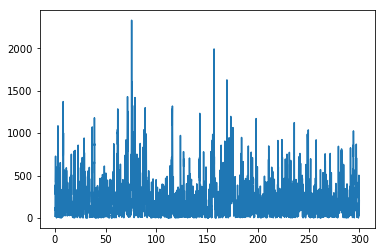

In [108]:

hertz = 20 #this is the sampling rate at which we record data
total_time = 300 #this is the number of seconds we simulate
data_points = hertz * total_time #total number of data points
particles = 200 #number of particles being simulated
position_vectors = np.array([np.zeros(particles),np.zeros(particles),np.zeros(particles)]) #the initial position for the particles is 0 in xy and z
intensity_time = np.array([]) #every intensity at a given time will be put into this array
for i in range(100):
    timestep(position_vectors, hertz) #this loop changes the position of the particles so that they aren't all in phase, whhich is non physical
for i in range(data_points):
    phases = phasemaker(position_vectors, math.pi /2) #first the phase is calcualted from the positions
    intense  = intensitymaker(phases) #then the intensity is determined from the phase
    intensity_time = np.append(intensity_time, intense) #this intensity is appended into our array
    timestep(position_vectors, hertz) #and the particles are moved

times = np.arange(0,total_time, 1/hertz) #this creates an array from 0 to the total time using the frequency as steps 
plt.plot(times, intensity_time )
plt.show()

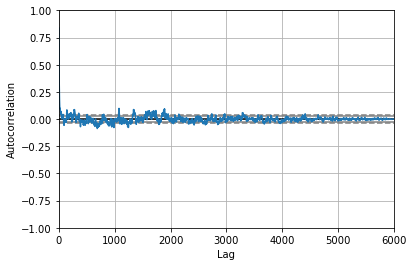

In [109]:
xauto,yauto = autocorrelation(intensity_time, times)

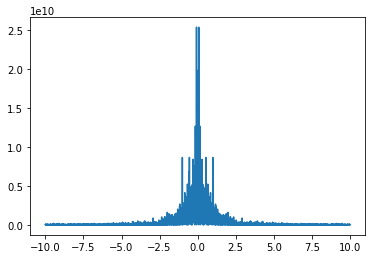

In [110]:
power, frequency = powerspectrum(intensity_time, hertz)
plt.show()


In [111]:
calculate_gamma(frequency, power, xauto, yauto)

0.0754254583628 0.0471068825813 2.17222346953e-06 4.16572523806e-05


NameError: name 'inf' is not defined

In [333]:

position_vectors = np.array([np.zeros(100),np.zeros(100),np.zeros(100)])

intensity_time = np.array([])
time = np.array([])


 

#intensity_time[0] = 0    
#x = np.correlate(intensity_time, intensity_time)
#plt.acorr(intensity_time)
#plt.plot(time, intensity_time)
#plt.show()

In [236]:
l = 0
m = 0
for i in range(100):
    r = np.random.normal(0,1)
    if r > 0:
        l +=  1   
    if r < 0:
        m += 1
if l > m:
    print("pos")
if l < m:
    print('neg')
if l == m:
    print('0')

0


In [98]:
math.sin(math.pi*2)

-2.4492935982947064e-16

In [32]:
?np.convolve

In [ ]:
times = np.arange(0,100,1)    
position_vectors = np.array([np.zeros(100),np.zeros(100),np.zeros(100)])
intensity_time = np.array([])
for i in range(100):
    phases = phasemaker(position_vectors, math.pi /2)
    intense  = intensitymaker(phases)
    intensity_time = np.append(intensity_time, intense)
    timestep(position_vectors)  

#autocorrelation(intensity_time, times)